In [1]:
from pynter.defects.analysis import DefectsAnalysis
from pynter.tools.utils import get_content_from_url

Import the `DefectAnalysis` object from the `json` file

In [2]:
data_url = 'https://raw.githubusercontent.com/lorenzo-villa-hub/pynter-tutorials/master/notebooks/defects/data/'

In [3]:
#da = DefectsAnalysis.from_json('./data/defects_analysis.json')
da = DefectsAnalysis.from_json(get_content_from_url(data_url+'defects_analysis.json'))

Import the `Reservoirs` object containing the chemical potentials 

In [4]:
from pynter.phase_diagram.chempots import Reservoirs

#res = Reservoirs.from_json('./data/reservoirs_extrinsic.json')
res = Reservoirs.from_json(get_content_from_url(data_url+'reservoirs_extrinsic.json'))

In [5]:
from pymatgen.electronic_structure.dos import FermiDos
from pynter.tools.utils import get_object_from_json

# import DOS
#dos = get_object_from_json(FermiDos,'./data/dos.json')
dos = get_object_from_json(FermiDos, get_content_from_url(data_url+'dos.json'))

In [6]:
res.get_dataframe(ndecimals=2)

,Na,Nb,O,Sr,Sn,Ca
A,-2.78,-11.10,-8.85,-5.19,-3.99,-6.00
B,-2.32,-11.22,-8.96,-5.19,-3.99,-6.00
C,-4.32,-21.26,-4.95,-8.19,-9.99,-9.00
D,-4.73,-20.85,-4.95,-8.19,-9.99,-9.00
X,-3.57,-16.25,-6.87,-7.48,-8.18,-7.92


# Filter entries

Choose which defects to analyse. The `DefectsAnalysis` class contains methods to organize and filter the defect entries based on different criteria. In this case (for simplicity) we choose to analyse only the vacancies.

In [7]:
da_vac = da.filter_entries(exclude=True,elements=['Ca','Sr','Sn'])
da_vac.get_dataframe()

,symbol,delta atoms,charge,multiplicity
name,,,,
Vac_Na,$V_{Na}$,{'Na': -1},-1.0,32
Vac_Na,$V_{Na}$,{'Na': -1},0.0,32
Vac_Na,$V_{Na}$,{'Na': -1},1.0,32
Vac_Na-Vac_O,$V_{Na}$-$V_{O}$,"{'Na': -1, 'O': -1}",-1.0,384
Vac_Na-Vac_O,$V_{Na}$-$V_{O}$,"{'Na': -1, 'O': -1}",0.0,384
Vac_Na-Vac_O,$V_{Na}$-$V_{O}$,"{'Na': -1, 'O': -1}",1.0,384
Vac_Na-Vac_O,$V_{Na}$-$V_{O}$,"{'Na': -1, 'O': -1}",2.0,384
Vac_Nb,$V_{Nb}$,{'Nb': -1},-5.0,32
Vac_Nb,$V_{Nb}$,{'Nb': -1},-4.0,32


# Plot formation energies

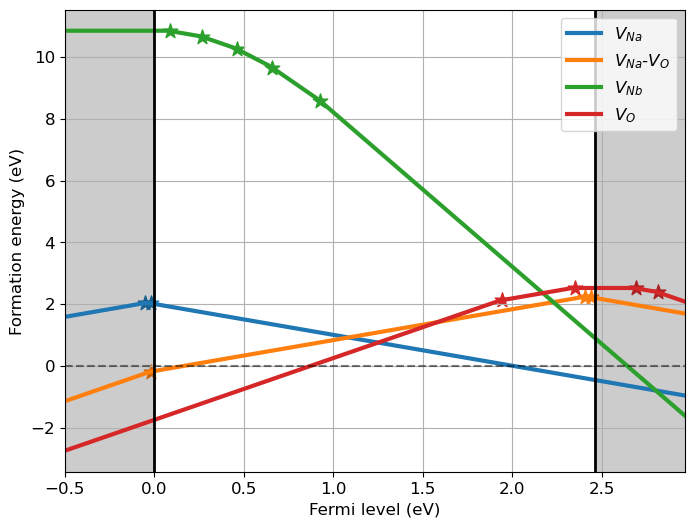

In [8]:
mu = res['X'] # choose chemical potentials

da_vac.plot(chemical_potentials=mu);

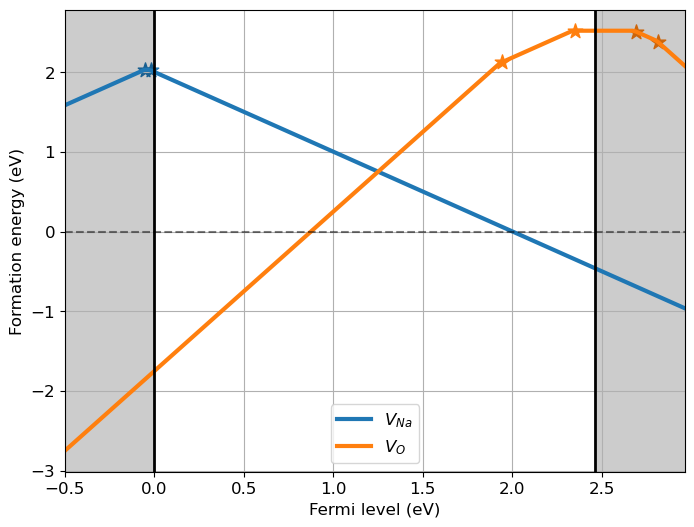

In [9]:
# Choose entries to plot

entries = da_vac.select_entries(types=['Vacancy'],elements=['Na','O'])
da_vac.plot(chemical_potentials=mu,entries=entries);

# Plot charge transition levels

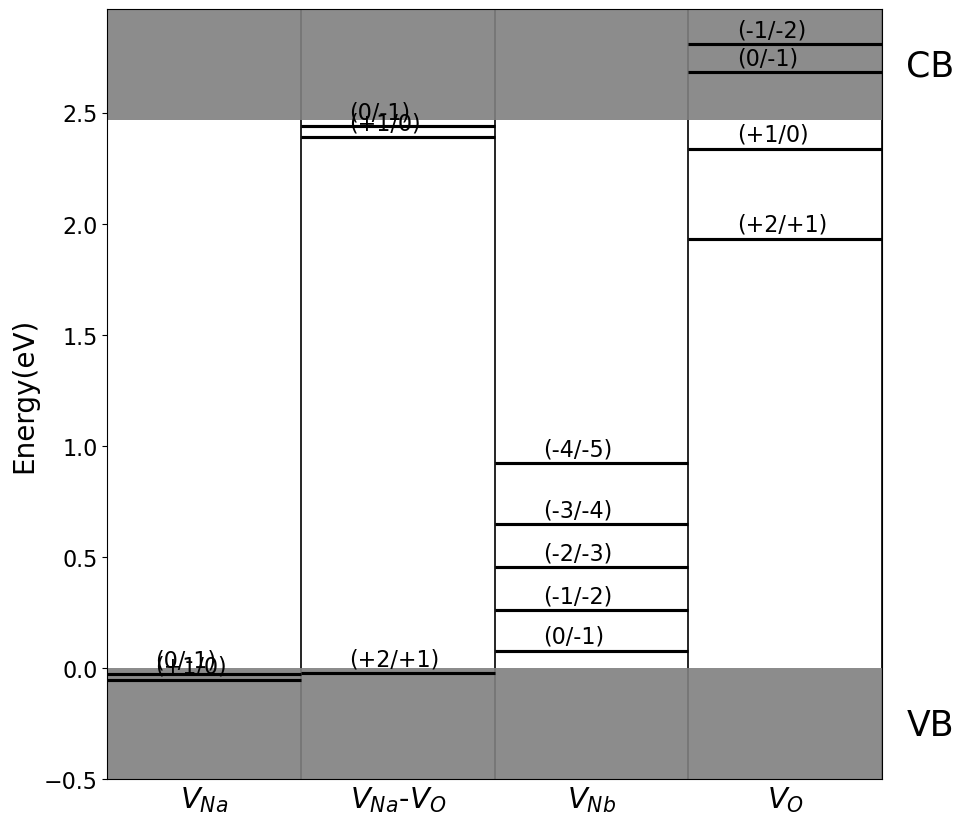

In [10]:
da_vac.plot_ctl();

# Plot binding energy

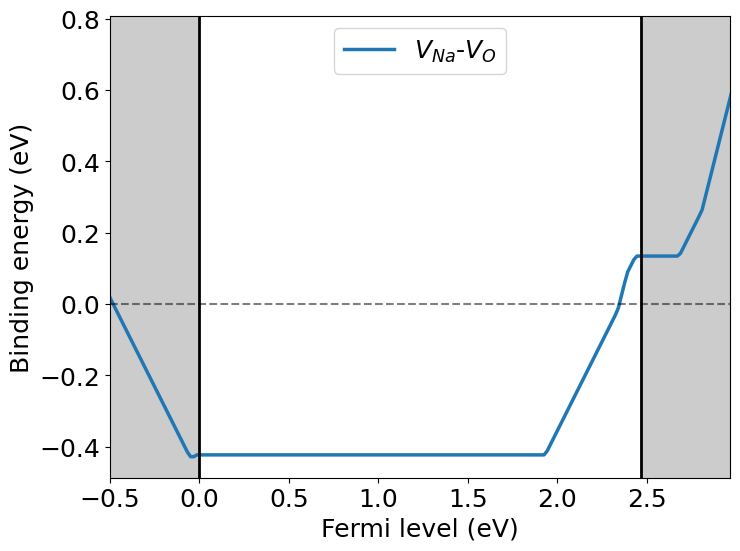

In [11]:
da_vac.plot_binding_energies();

## Compute the Fermi level and defect concentrations solving the charge neutrality condition

In [12]:
fermi_level = da_vac.solve_fermi_level(chemical_potentials=mu,bulk_dos=dos,temperature=300)
fermi_level

/nfshome/villa/pynter/pynter/defects/pmg/pmg_dos.py:1029: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp((fermi - E) / (_cd("Boltzmann constant in eV/K") * T)))


1.2662828250885008

In [13]:
concentrations = da_vac.defect_concentrations(chemical_potentials=mu,temperature=300,fermi_level=fermi_level)
concentrations

[charge=-1.0, conc=6.39e+09, name=Vac_Na, stable=True
charge=0.0, conc=1.14e-12, name=Vac_Na, stable=True
charge=1.0, conc=7.43e-35, name=Vac_Na, stable=True
charge=-1.0, conc=1.79e-34, name=Vac_Na-Vac_O, stable=True
charge=0.0, conc=8.56e-15, name=Vac_Na-Vac_O, stable=True
charge=1.0, conc=6.45e+04, name=Vac_Na-Vac_O, stable=True
charge=2.0, conc=1.41e-17, name=Vac_Na-Vac_O, stable=True
charge=-5.0, conc=3.87e-94, name=Vac_Nb, stable=True
charge=-4.0, conc=6.18e-100, name=Vac_Nb, stable=True
charge=-3.0, conc=2.55e-110, name=Vac_Nb, stable=True
charge=-2.0, conc=5.58e-124, name=Vac_Nb, stable=True
charge=-1.0, conc=7.14e-141, name=Vac_Nb, stable=True
charge=0.0, conc=7.72e-161, name=Vac_Nb, stable=True
charge=-2.0, conc=4.43e-70, name=Vac_O, stable=True
charge=-1.0, conc=3.54e-44, name=Vac_O, stable=True
charge=0.0, conc=2.05e-20, name=Vac_O, stable=True
charge=1.0, conc=2.06e-02, name=Vac_O, stable=True
charge=2.0, conc=3.19e+09, name=Vac_O, stable=True]

# The same works for the extended dataset

<module 'matplotlib.pyplot' from '/nfshome/villa/miniconda3/envs/recent/lib/python3.11/site-packages/matplotlib/pyplot.py'>

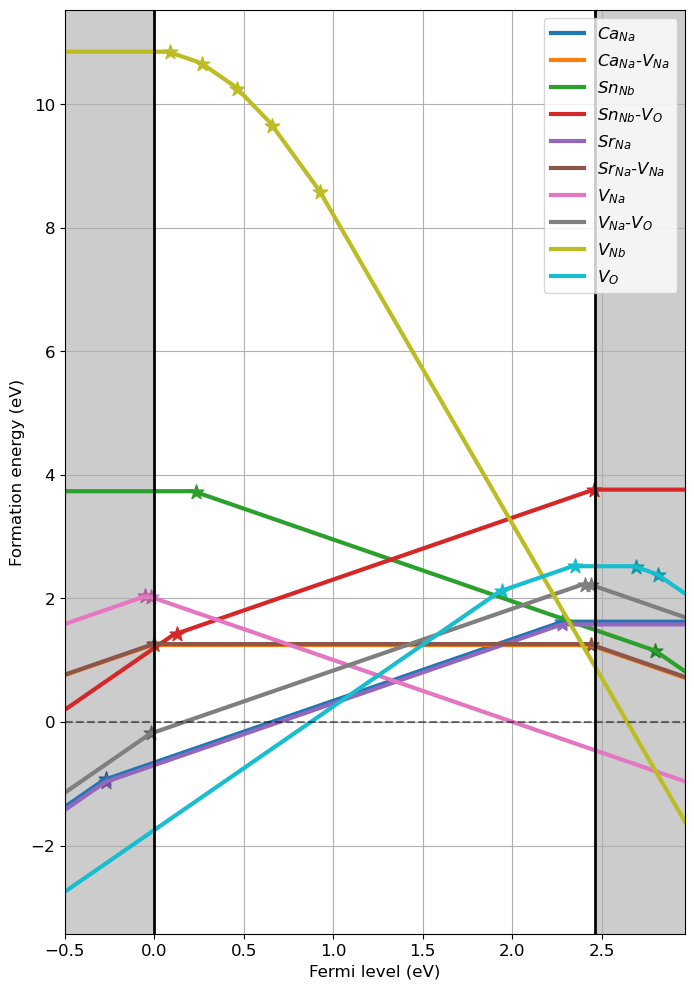

In [14]:
da.plot(mu,plotsize=(1,2))

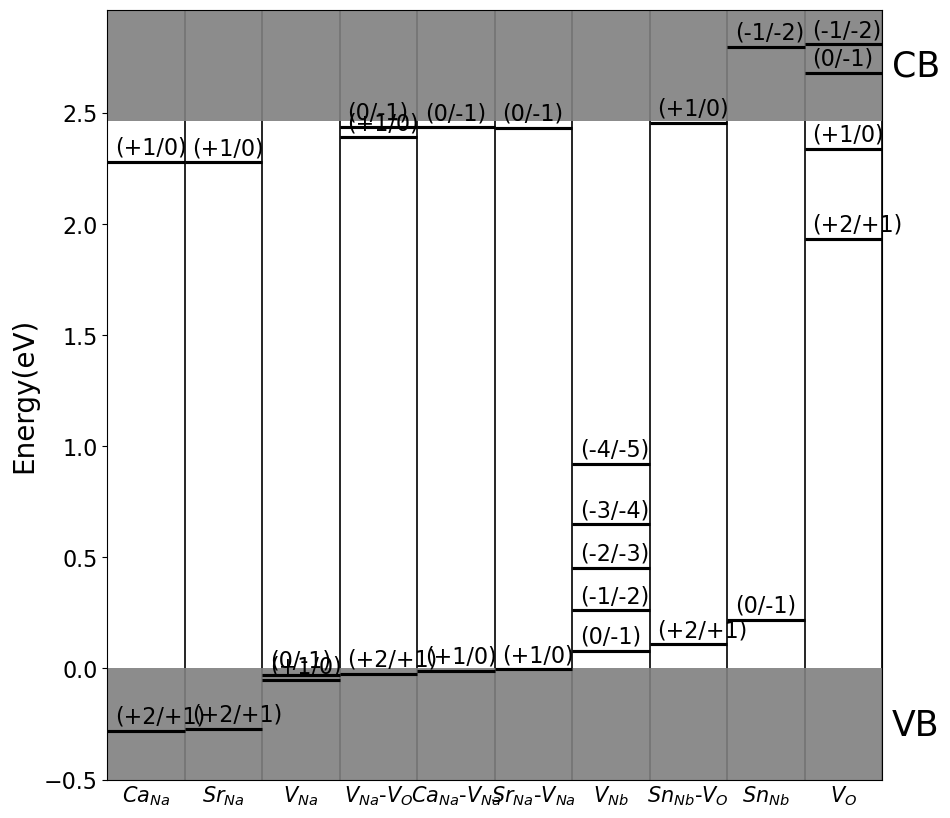

In [15]:
da.plot_ctl();

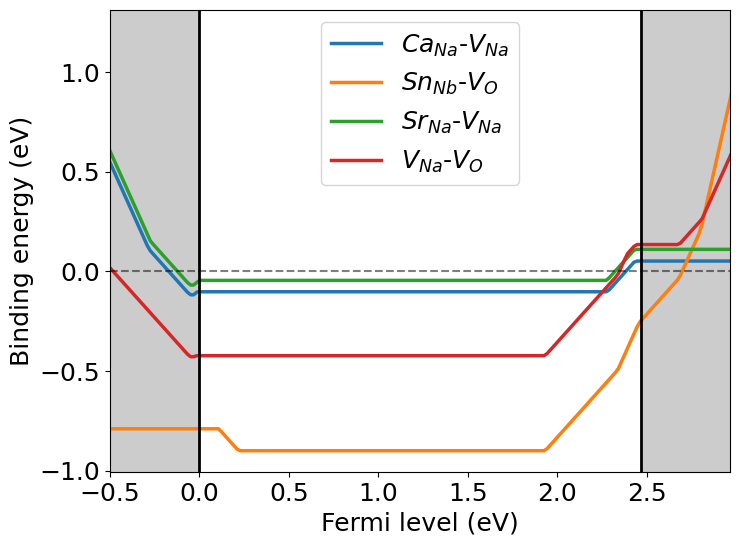

In [16]:
da.plot_binding_energies();